## EDA (Exploratory data analysis)
- exploratory data anaysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. it is used to discover
- trends, patterns or to check assumption with the help of statitical summary and graphical reprentation
 #  steps to EDA
 1. Describing the data
  2. Data cleaning
  3. imputation techniques
  4. Data analysis and visualization
  5. Transformation

- import datas and data descriprtion

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('data_clean.csv', index_col=0)
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [5]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [6]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [8]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [9]:
df['Month'].replace('May',5,inplace=True)

In [10]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [11]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [12]:
# to convert into integer type
df['Month'].astype(int)

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [13]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [14]:
# to change the value permanently
df['Month'] = df['Month'].astype(int)

In [15]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

## DUPLICATES

In [17]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [18]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(157, 9)

In [21]:
df.duplicated().sum()

0

## Drop columns

- There is one column which only has single different value.
- We need to get rid of all the unnexxesary columns or else it will be very complex data

In [24]:
df.head(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
6,28.0,NaN,14.9,66,5,6,2010,66,C
7,23.0,299.0,8.6,65,5,7,2010,65,PS
8,19.0,99.0,13.8,59,5,8,2010,59,C
9,8.0,19.0,20.1,61,5,9,2010,61,PS
10,NaN,194.0,8.6,69,5,10,2010,69,S


In [25]:
df.drop(columns = ['Year','Temp C'],inplace = True)


In [26]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


## Rename the column

In [28]:
df.rename(columns = {'Solar.R':'Solar','Temp':'Temperature'},inplace=True)

In [29]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [30]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

# Rule for missing value imputation:
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace)
3. If NA values are greater than 50% in a column, drop that entire column.

- calculating the percentage of missing values in easch column


In [33]:
for i in df.isna().sum():
    print((i/len(df))*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


In [34]:
df['Ozone'].median()

31.0

In [35]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [36]:
df['Ozone'].fillna(ozone_median, inplace=True) # inplace function is use for replace function permanently

In [37]:
df.isna().sum()

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [38]:
df['Solar'].mean()

185.36666666666667

In [39]:
df['Solar'].fillna(df['Solar'].mean(), inplace=True)

In [40]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [41]:
df['Weather'].mode()[0]

'S'

In [42]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [43]:
# or shutcut

In [44]:
df['Weather'].fillna('S', inplace=True)

In [45]:
df.isna().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

# outlier detection

- there are multiple approach to detect outliers in the data set
  - Histogram
  - Boxplot
  - Descriptive stats for df

In [48]:
df.describe()

,Ozone,Solar,Wind,Month,Day,Temperature
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,39.197452,185.366667,9.929936,7.019108,15.929936,77.745223
std,28.781992,86.998999,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


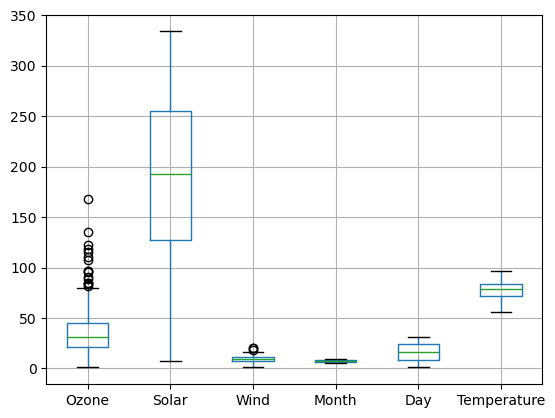

In [49]:
df.boxplot()
plt.show()

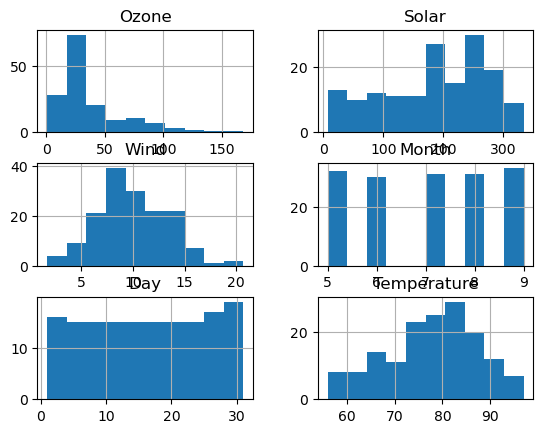

In [50]:
df.hist()
plt.show()

In [51]:
# for increasing the size and quality of the immage
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

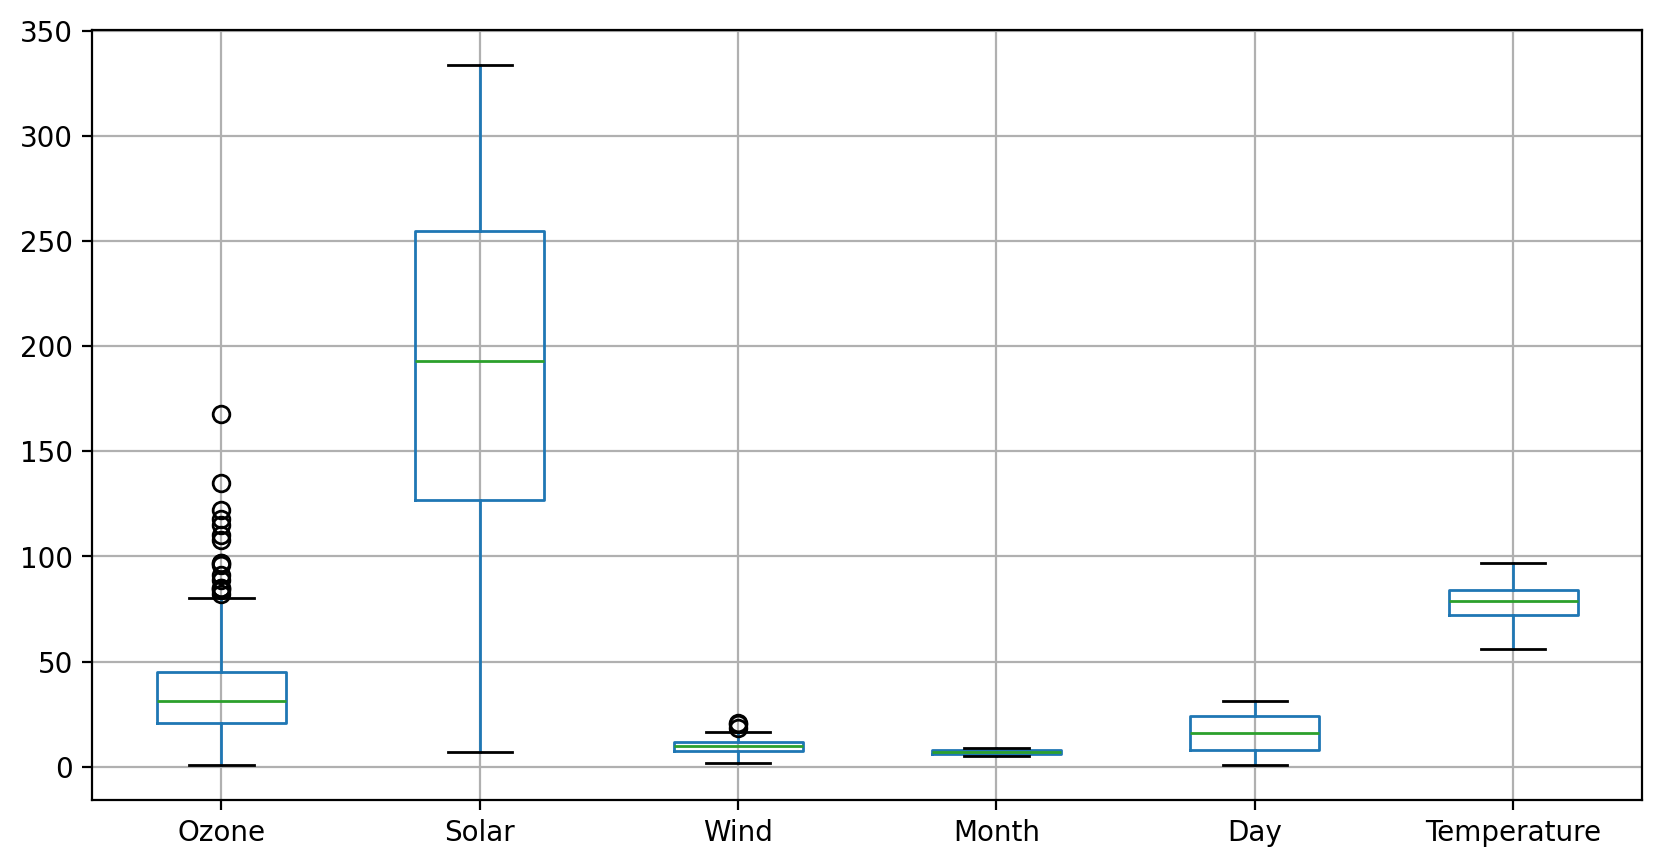

In [52]:
df.boxplot()
plt.show()

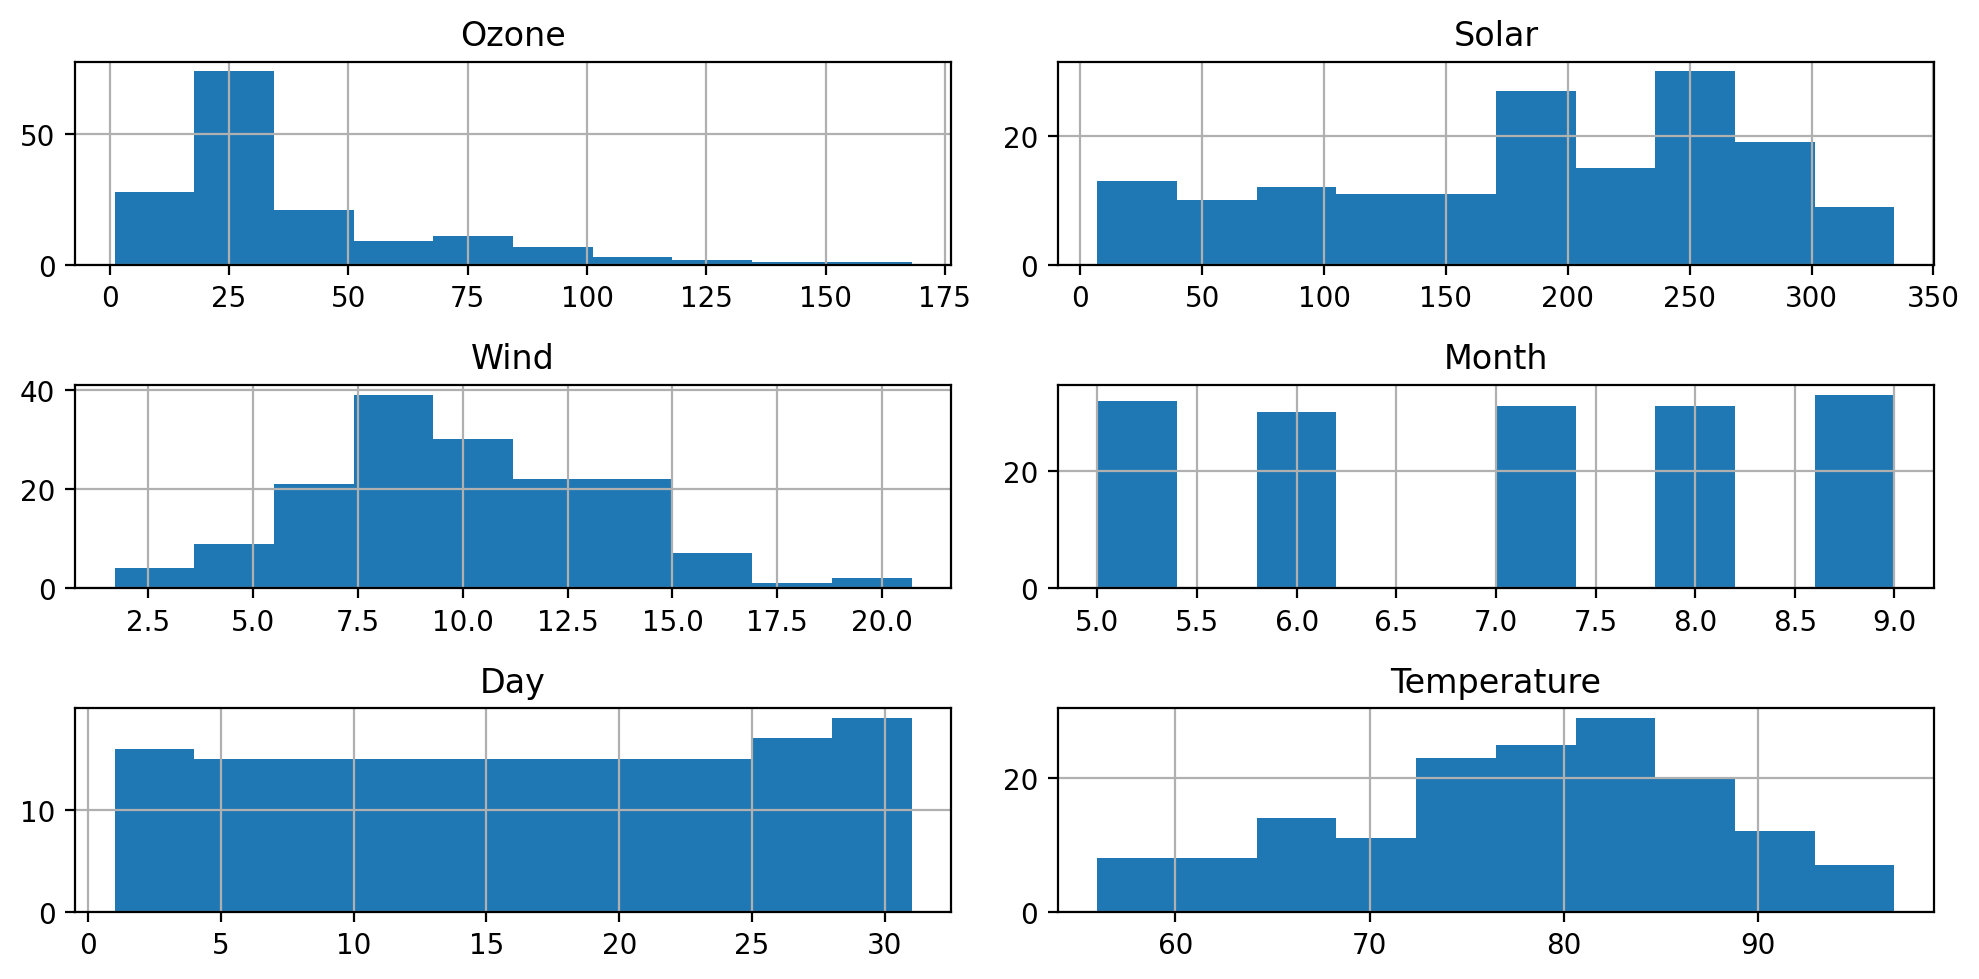

In [53]:
# To handle the overlapping problems
df.hist()
plt.tight_layout()
plt.show()

In [54]:
numbers = np.array([2, 8, 5, 10, 3])
result = np.where(numbers > 5, "High", "Low")

print(result)

['Low' 'High' 'Low' 'High' 'Low']


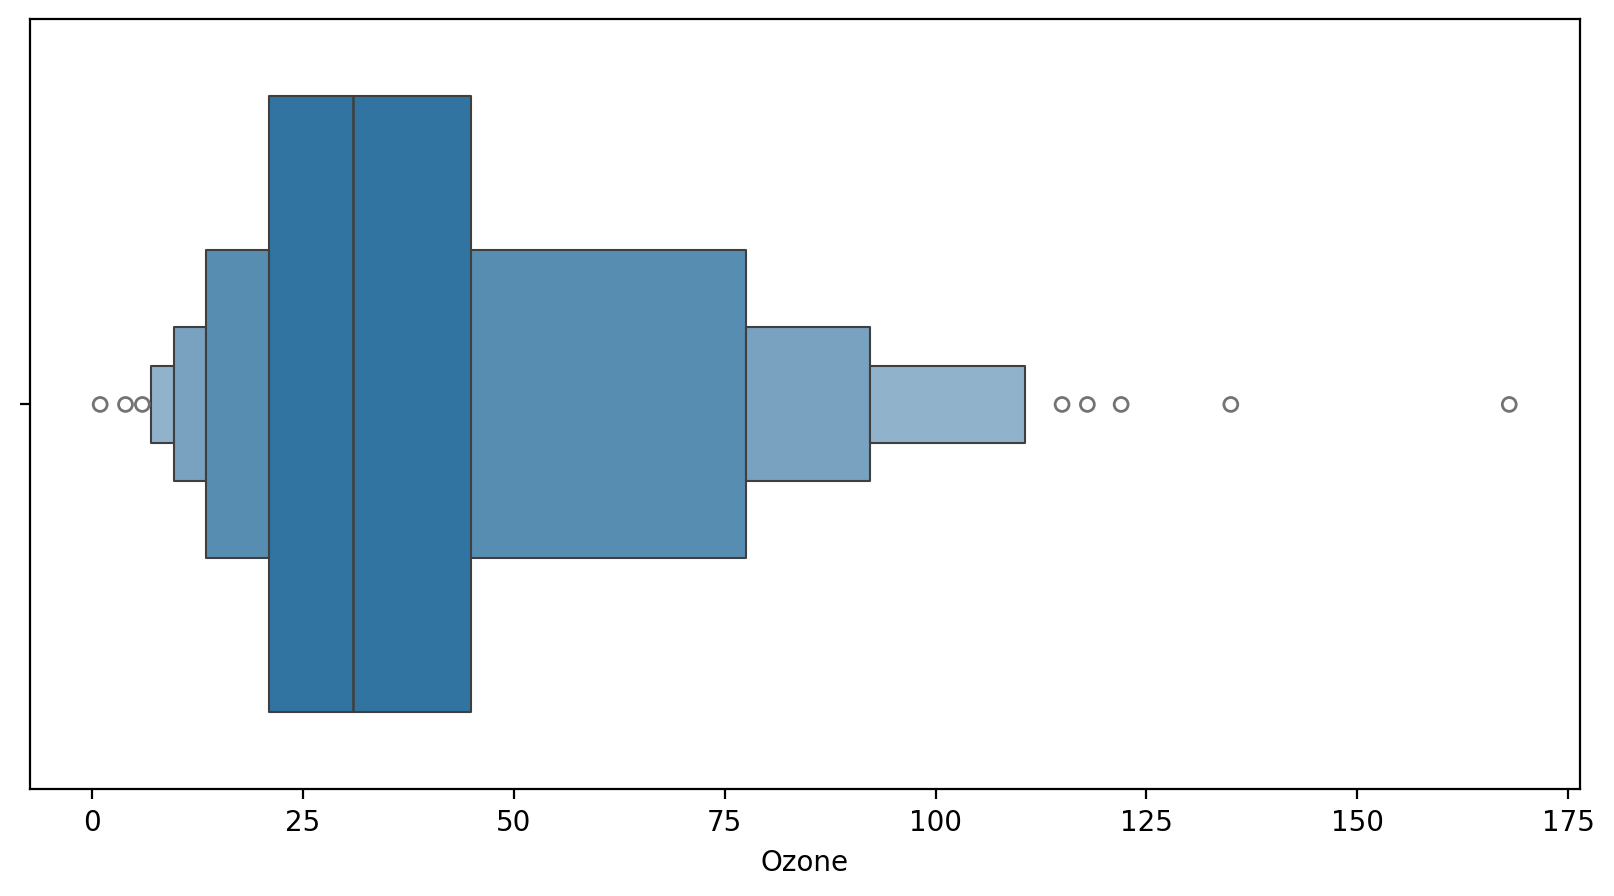

In [55]:
sns.boxenplot(x=df['Ozone'])
plt.show()

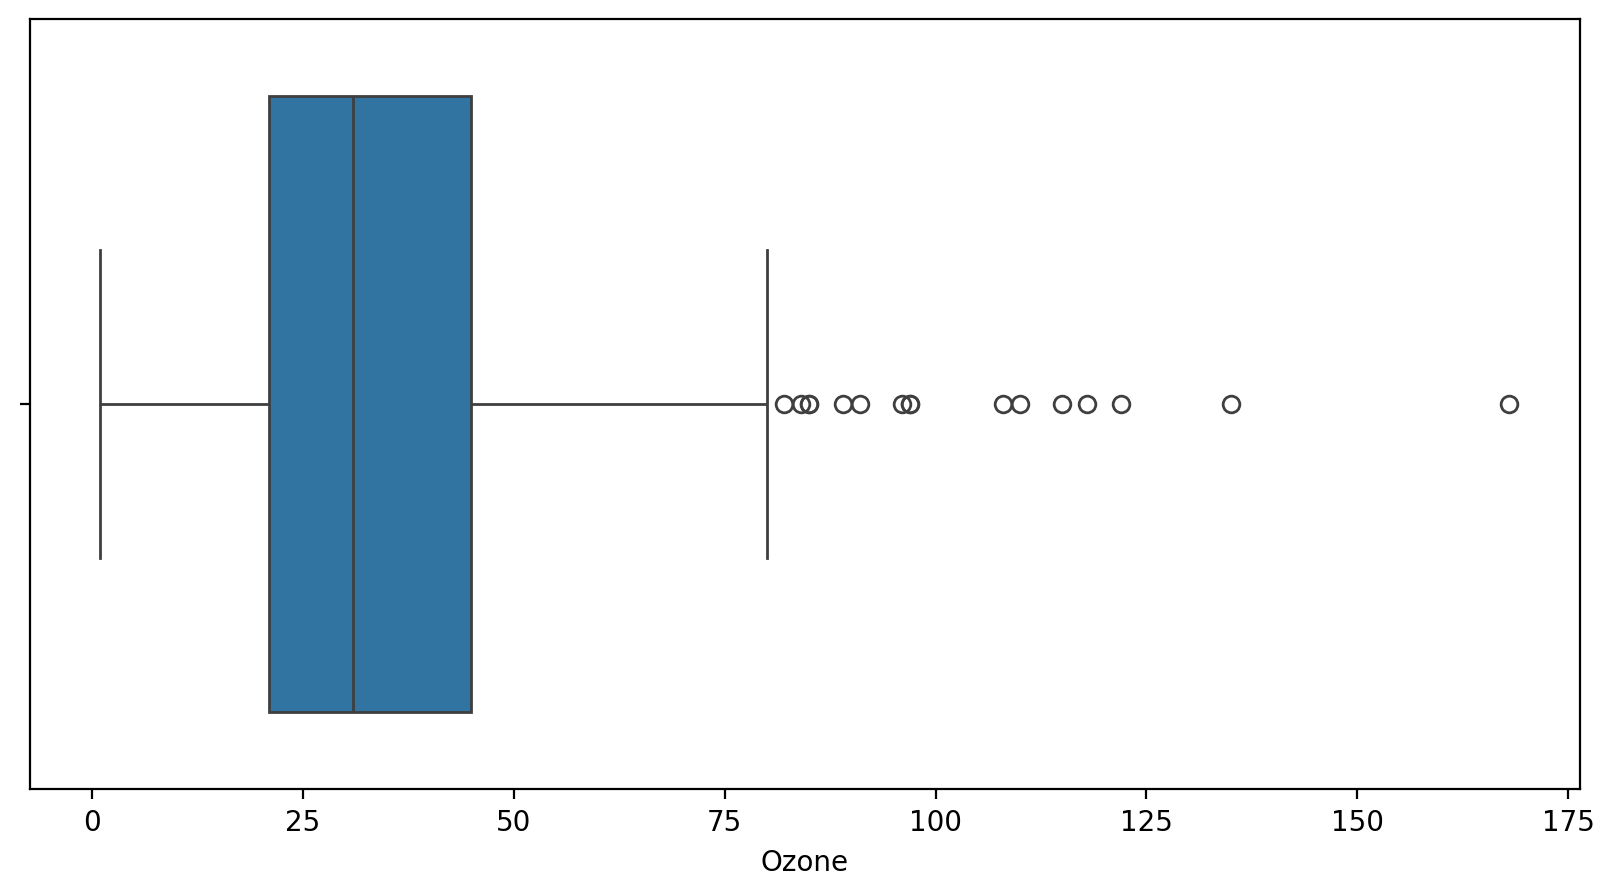

In [56]:
sns.boxplot(x=df['Ozone'])
plt.show()

In [57]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather'], dtype='object')

In [58]:
df['Ozone'].quantile(0.75)

45.0

In [59]:
def capping(df, columns):
    
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [60]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.000000,7.4,5,1,67,S
2,36.0,118.000000,8.0,5,2,72,C
3,12.0,149.000000,12.6,5,3,74,PS
4,18.0,313.000000,11.5,5,4,62,S
5,31.0,185.366667,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9,30,68,S
154,41.0,190.000000,7.4,5,1,67,C
155,30.0,193.000000,6.9,9,26,70,PS
156,31.0,145.000000,13.2,9,27,77,S


In [61]:
df.drop(columns=['Weather']).columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature'], dtype='object')

In [62]:
capping(df,df.drop(columns=['Weather']).columns)

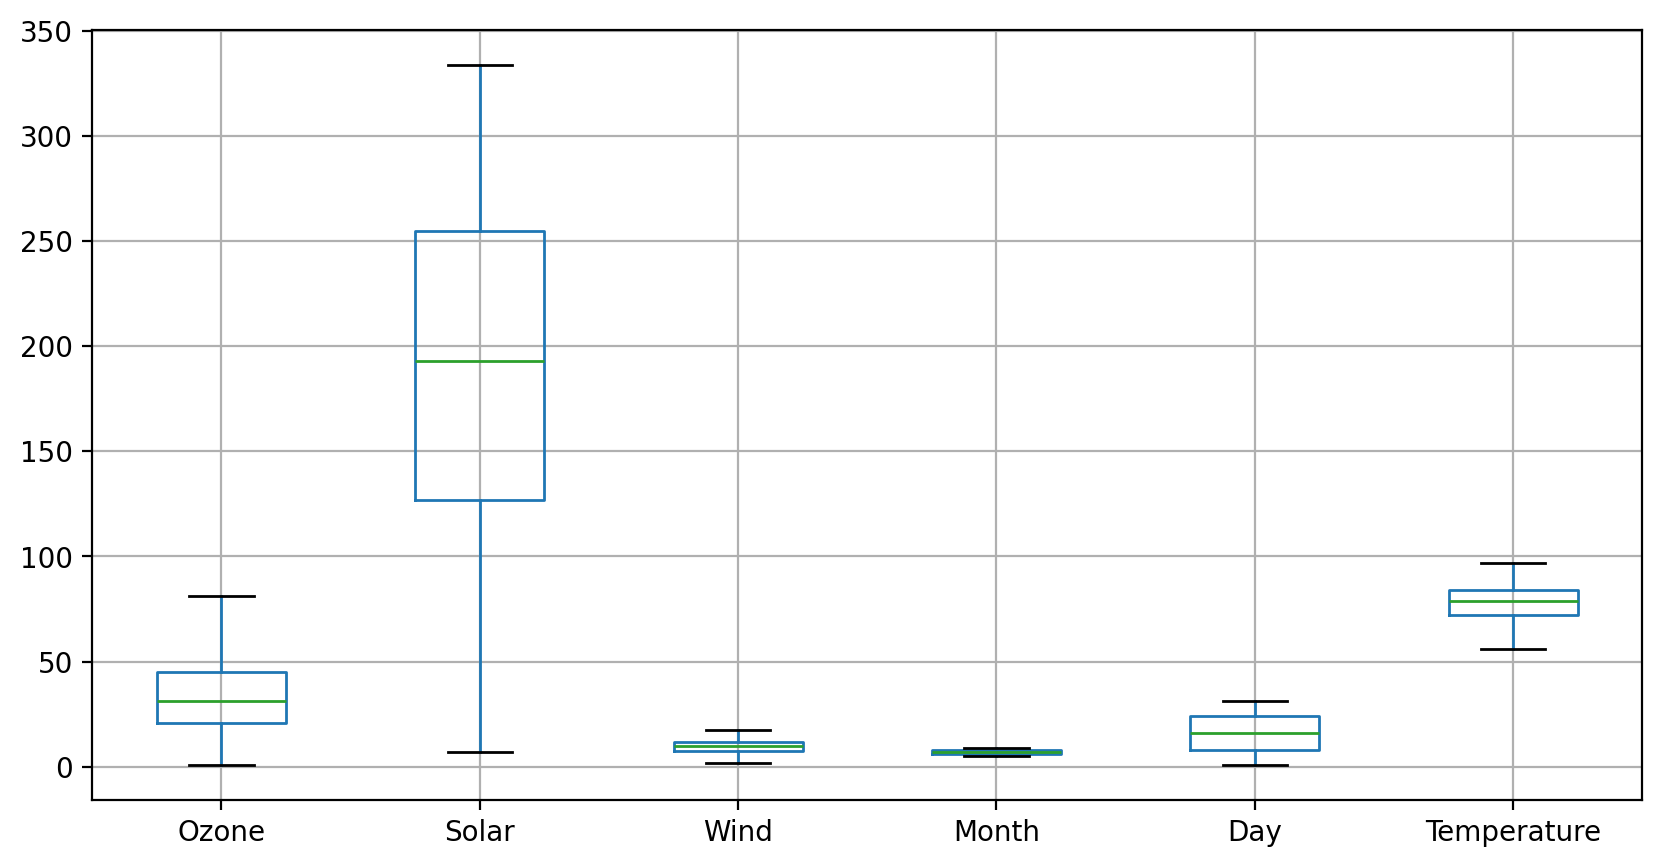

In [63]:
df.boxplot()
plt.show()

## scatter plot and Correlation

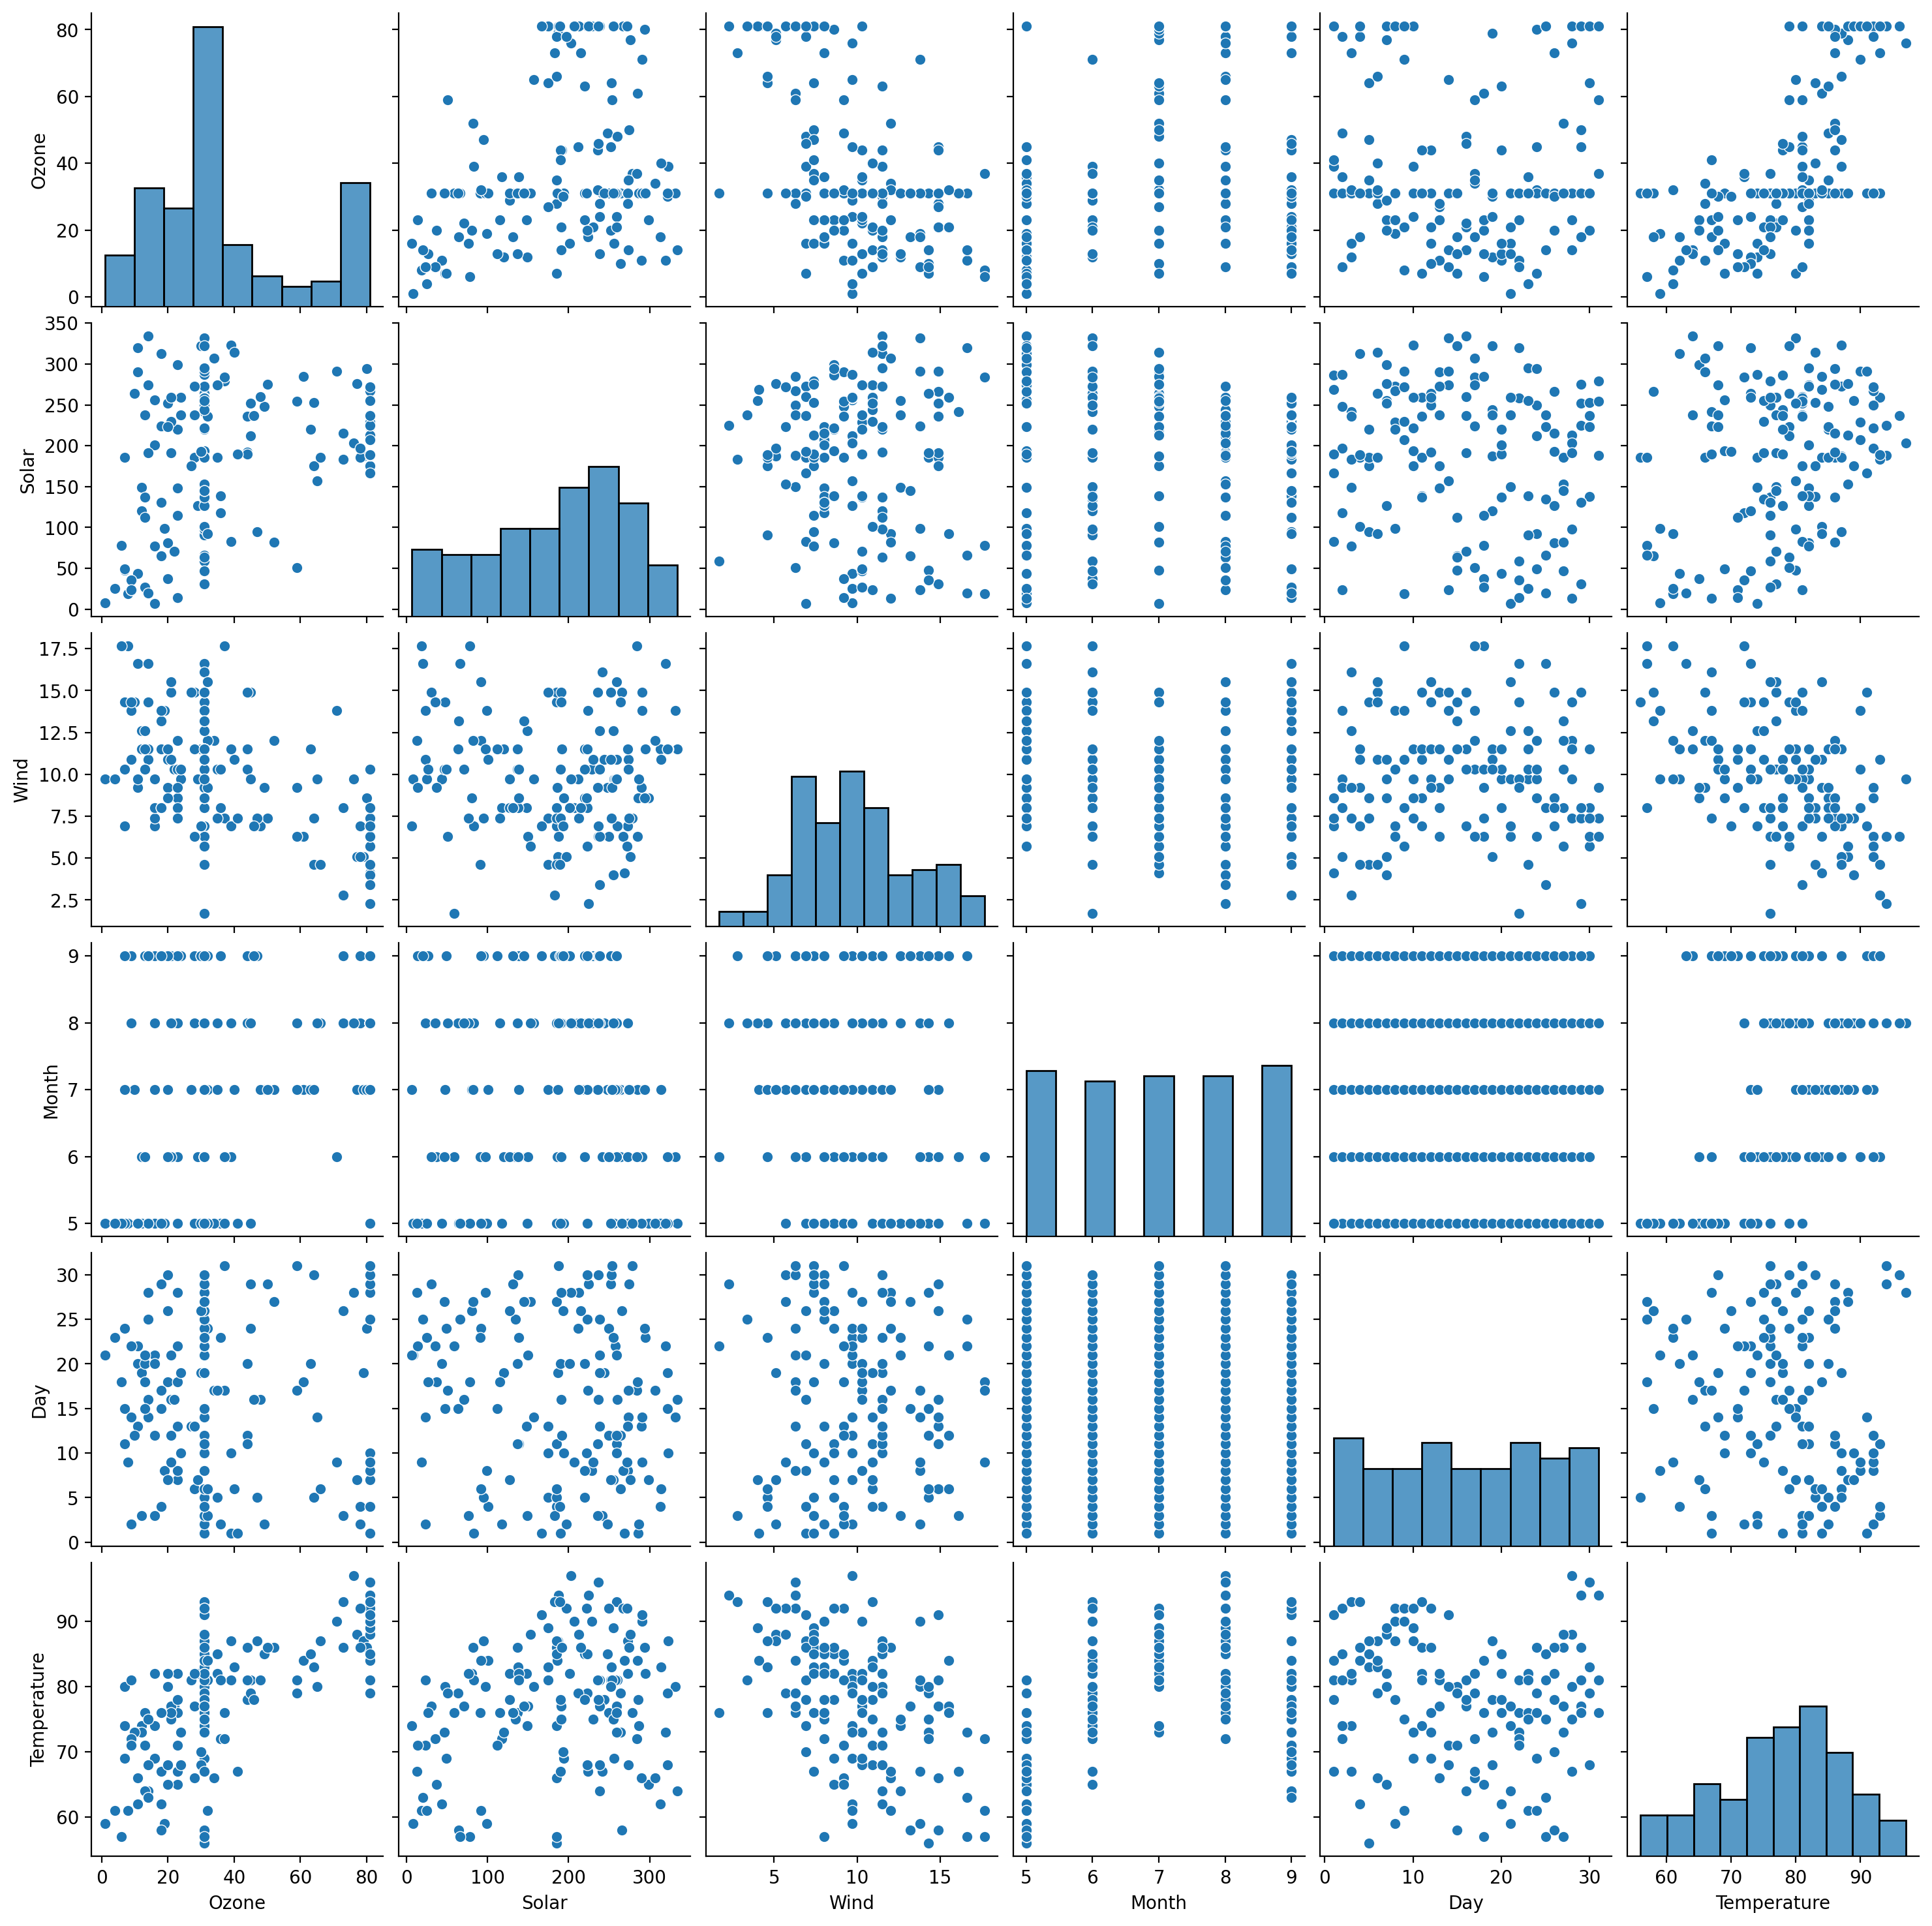

In [65]:
sns.pairplot(df)
plt.show()

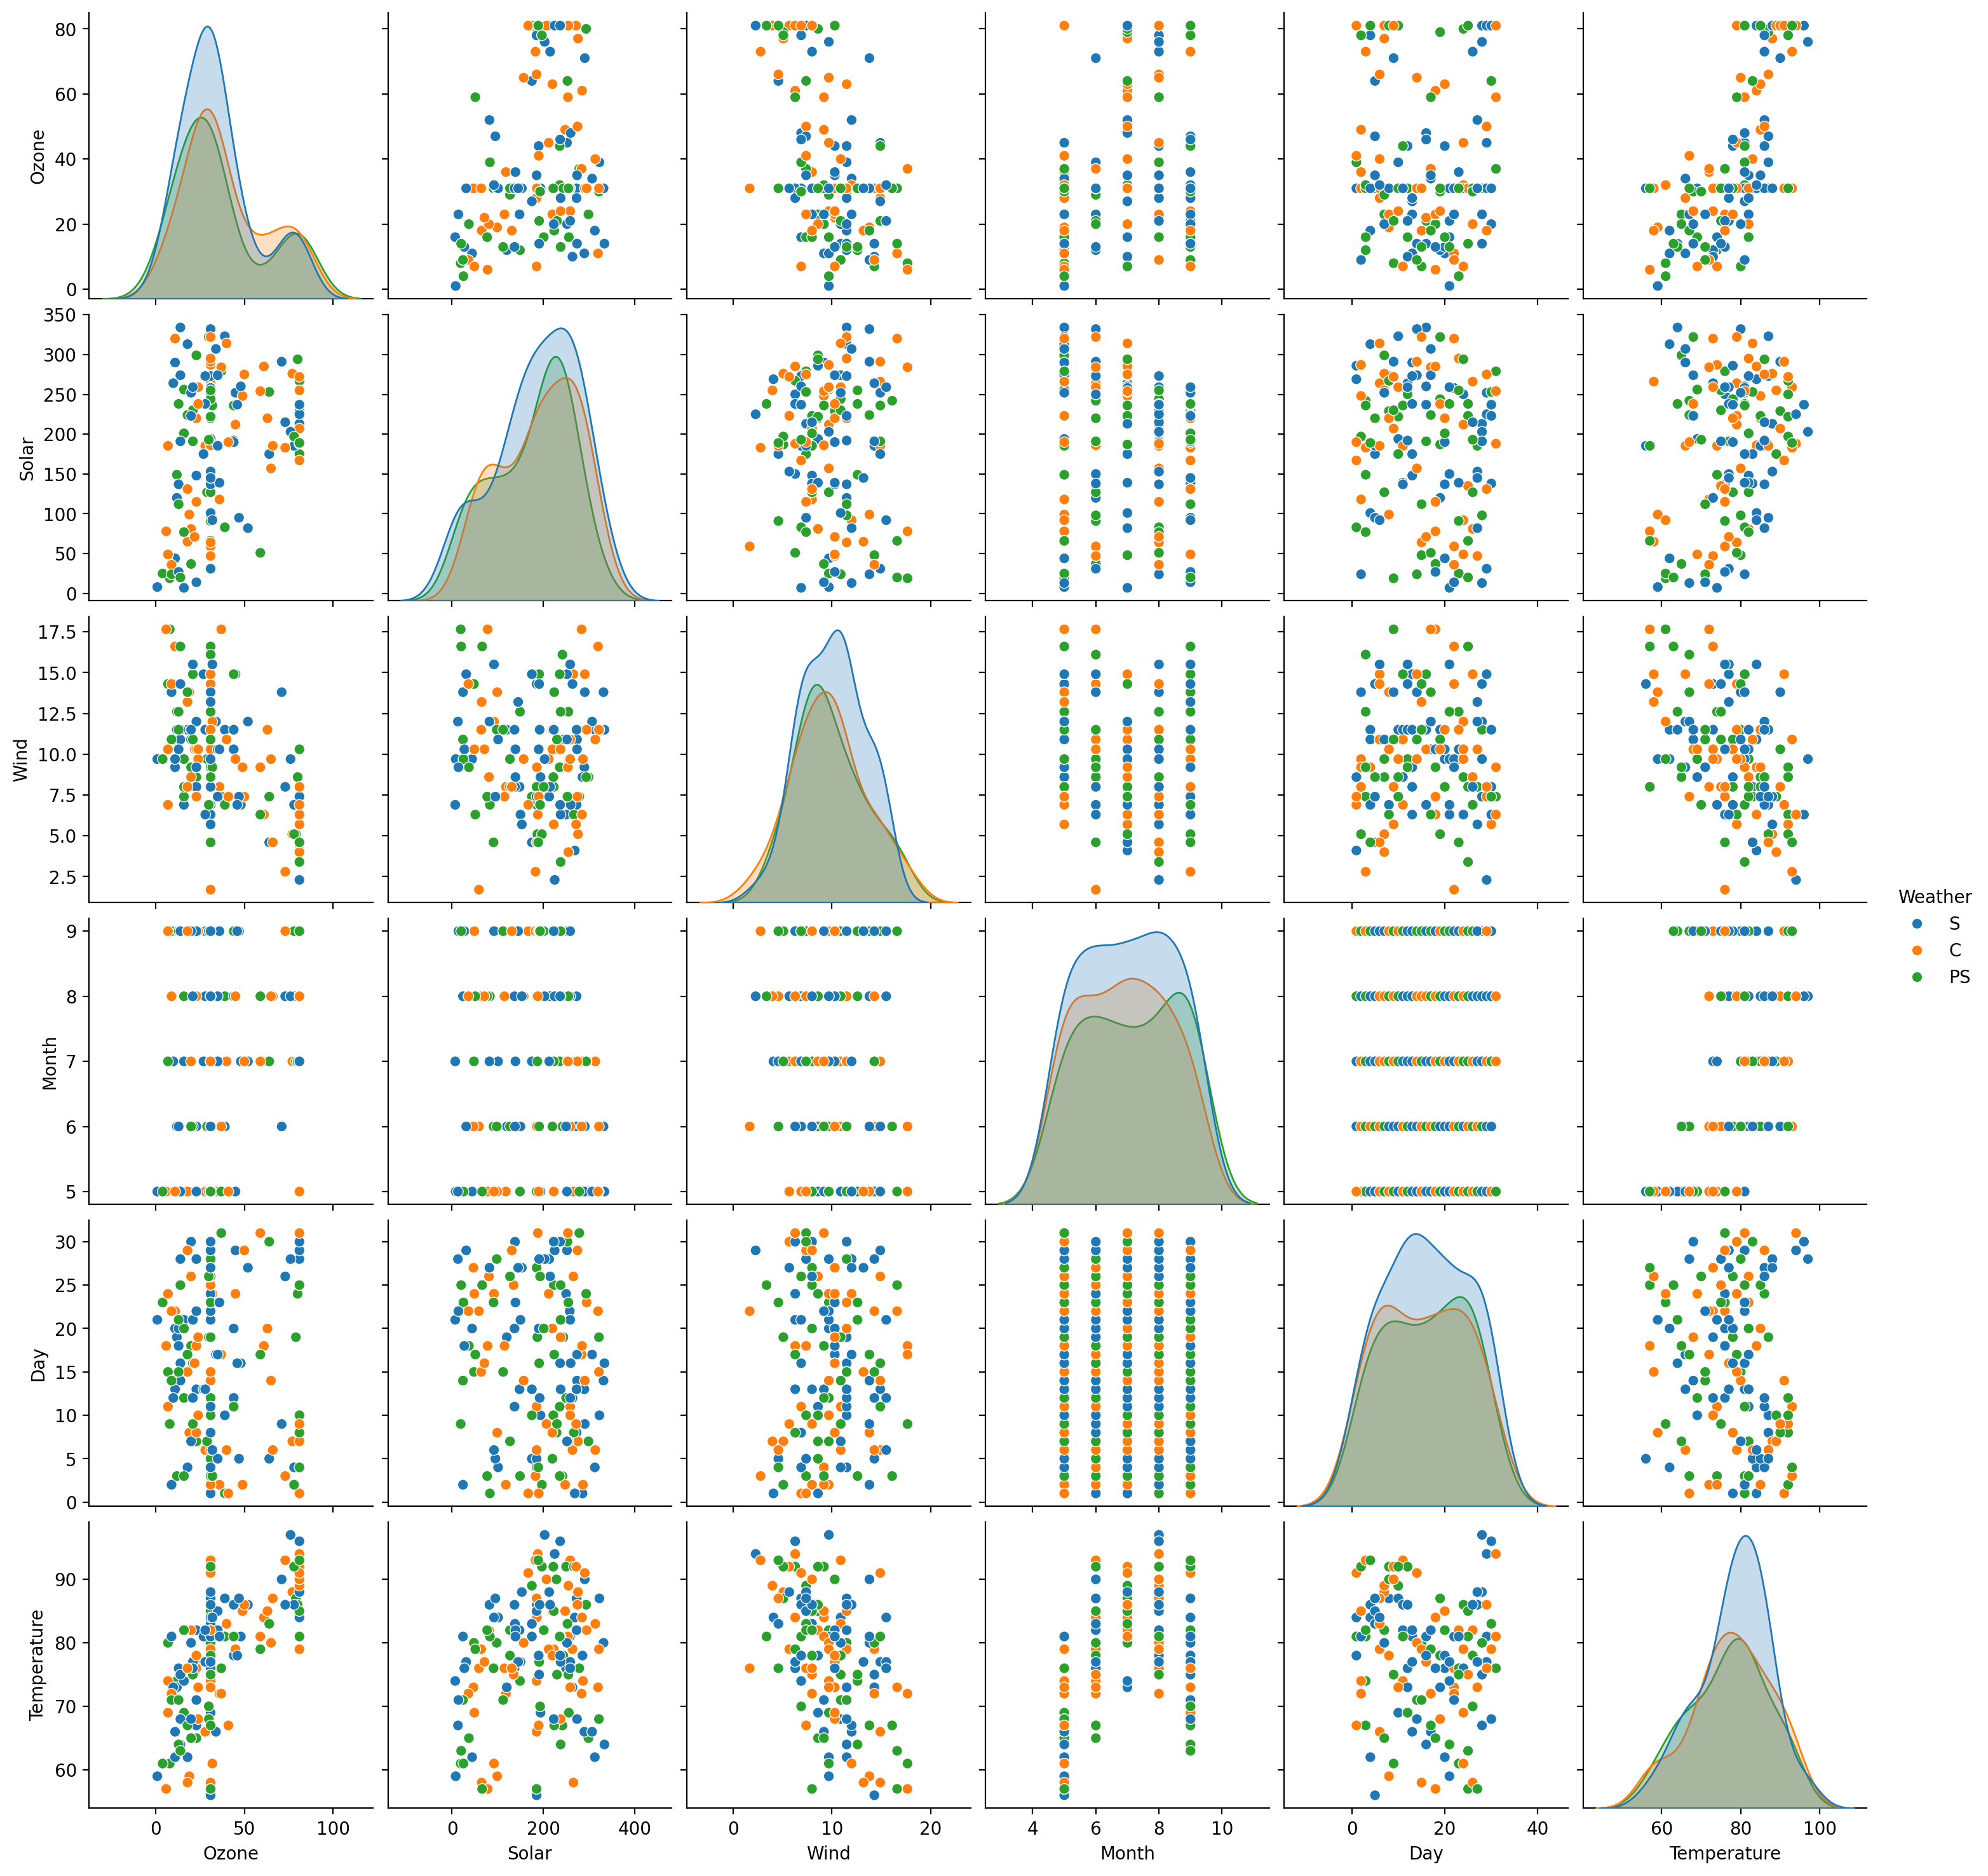

In [66]:
sns.pairplot(df, hue='Weather')
plt.show()

In [67]:
df.corr(numeric_only= True)

,Ozone,Solar,Wind,Month,Day,Temperature
Ozone,1.000000,0.317926,-0.522513,0.183089,-0.042835,0.662773
Solar,0.317926,1.000000,-0.053534,-0.080237,-0.151007,0.260677
Wind,-0.522513,-0.053534,1.000000,-0.162988,0.033374,-0.439939
Month,0.183089,-0.080237,-0.162988,1.000000,0.041438,0.408060
Day,-0.042835,-0.151007,0.033374,0.041438,1.000000,-0.122787
Temperature,0.662773,0.260677,-0.439939,0.408060,-0.122787,1.000000


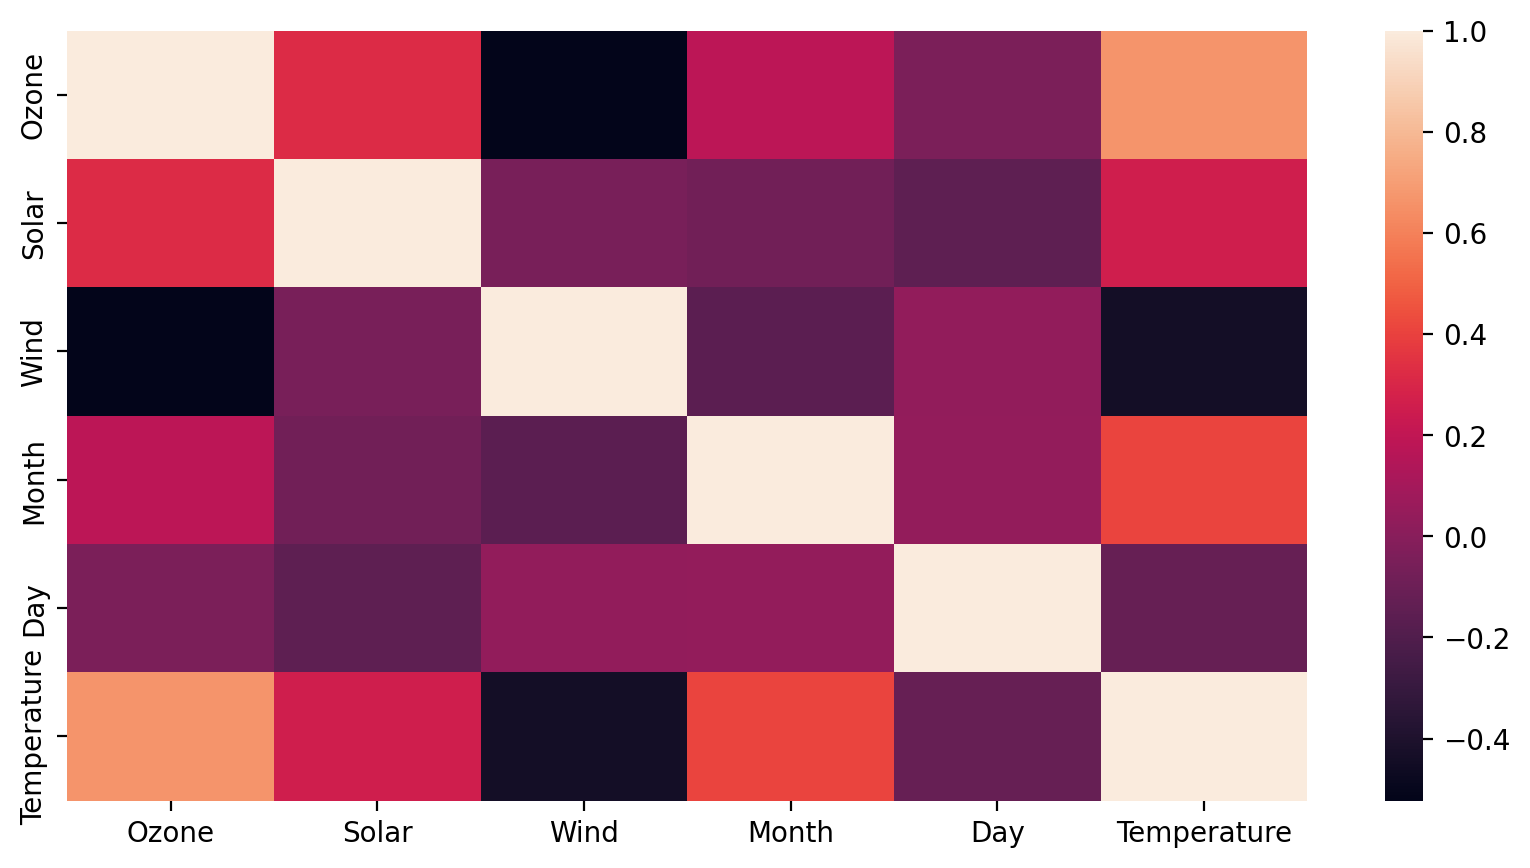

In [68]:
sns.heatmap(df.corr(numeric_only= True))
plt.show()

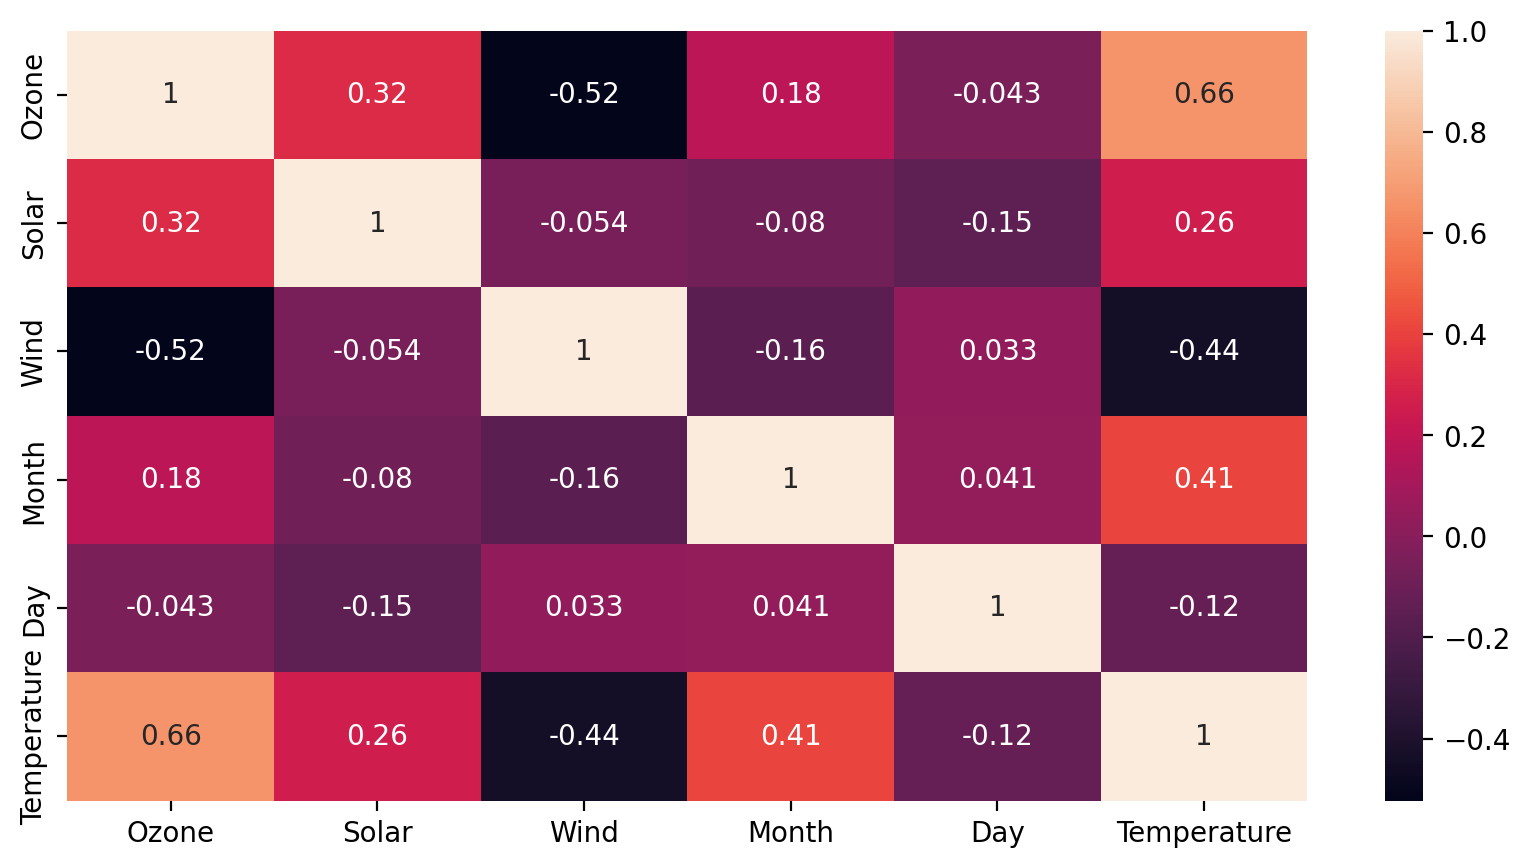

In [69]:
sns.heatmap(df.corr(numeric_only= True),annot= True)
plt.show()

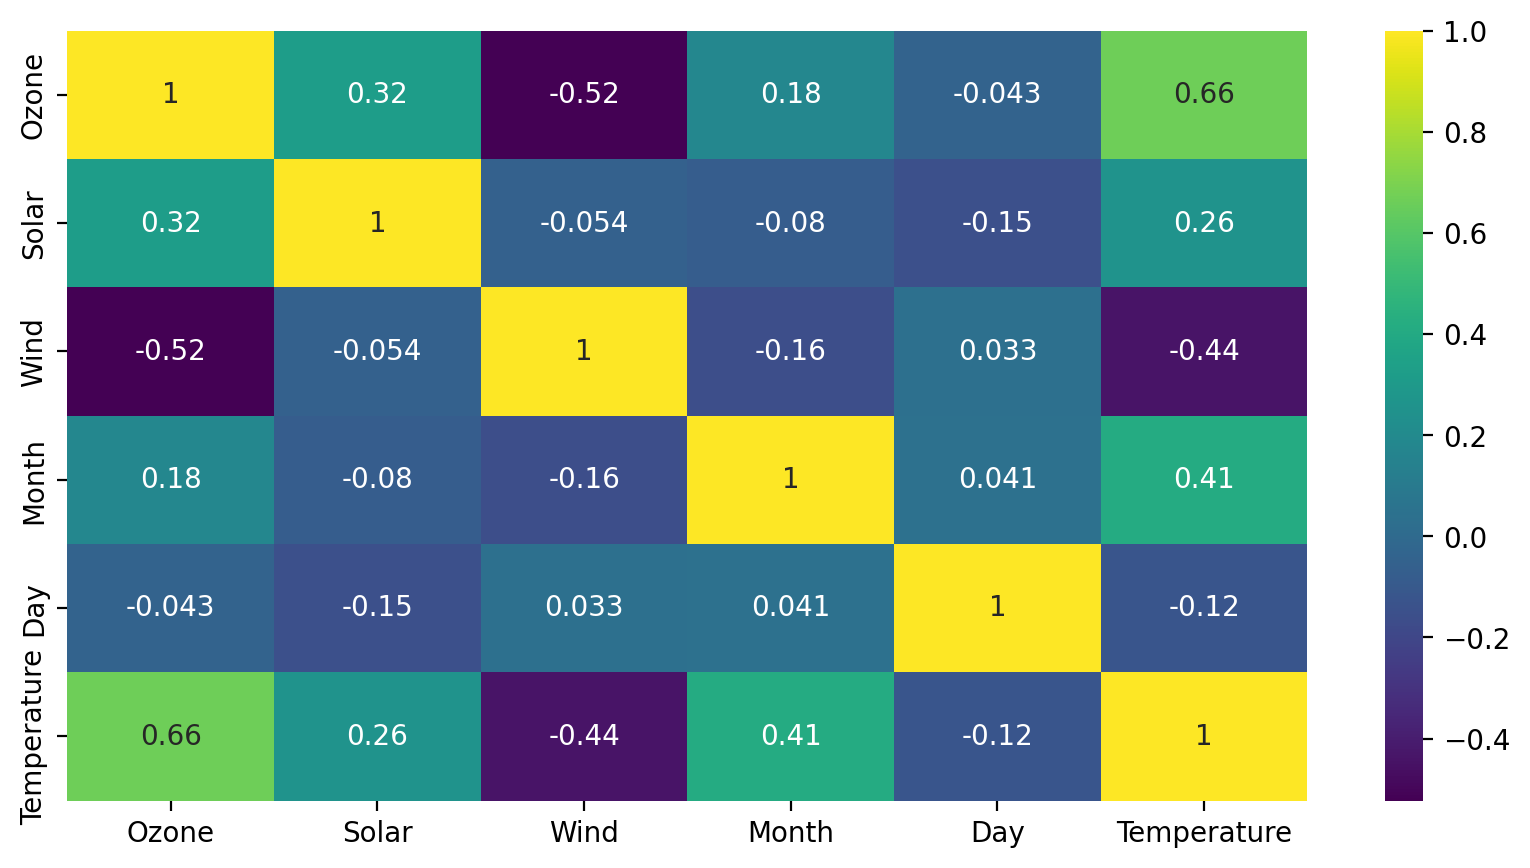

In [70]:
sns.heatmap(df.corr(numeric_only= True),annot= True, cmap='viridis')
plt.show()

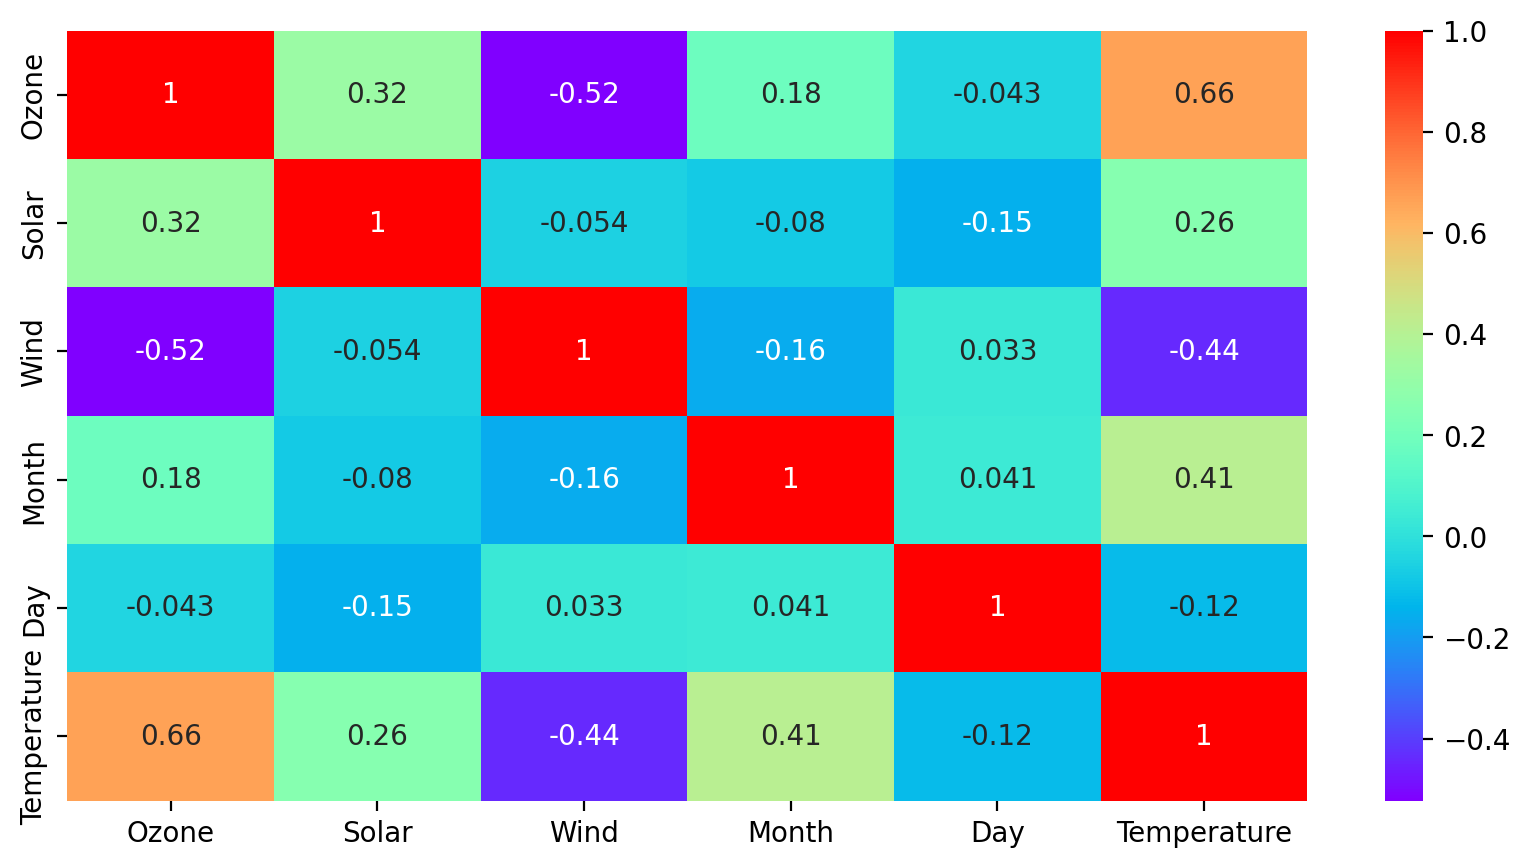

In [71]:
sns.heatmap(df.corr(numeric_only= True),annot= True, cmap='rainbow')
plt.show()

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [73]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
1,41.0,190.000000,7.4,5.0,1.0,67.0,S
2,36.0,118.000000,8.0,5.0,2.0,72.0,C
3,12.0,149.000000,12.6,5.0,3.0,74.0,PS
4,18.0,313.000000,11.5,5.0,4.0,62.0,S
5,31.0,185.366667,14.3,5.0,5.0,56.0,S


In [74]:
#Encoding using pandas dummy function.

In [75]:
pd.get_dummies(data=df,columns= ['Weather'])

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,False,False,True
2,36.0,118.000000,8.0,5.0,2.0,72.0,True,False,False
3,12.0,149.000000,12.6,5.0,3.0,74.0,False,True,False
4,18.0,313.000000,11.5,5.0,4.0,62.0,False,False,True
5,31.0,185.366667,14.3,5.0,5.0,56.0,False,False,True
...,...,...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,False,False,True
154,41.0,190.000000,7.4,5.0,1.0,67.0,True,False,False
155,30.0,193.000000,6.9,9.0,26.0,70.0,False,True,False
156,31.0,145.000000,13.2,9.0,27.0,77.0,False,False,True


In [76]:
df = pd.get_dummies(data=df,columns= ['Weather'], dtype=int) # to convert weather column into numeric 

In [77]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.000000,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.000000,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.000000,11.5,5.0,4.0,62.0,0,0,1
5,31.0,185.366667,14.3,5.0,5.0,56.0,0,0,1
...,...,...,...,...,...,...,...,...,...
153,20.0,223.000000,11.5,9.0,30.0,68.0,0,0,1
154,41.0,190.000000,7.4,5.0,1.0,67.0,1,0,0
155,30.0,193.000000,6.9,9.0,26.0,70.0,0,1,0
156,31.0,145.000000,13.2,9.0,27.0,77.0,0,0,1


# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [79]:
# standard scaler use for z score standadisation
# MinMaxScaler use to perform normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [80]:
sc = StandardScaler() # it is use for z score standadisation

In [81]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
1,41.0,190.000000,7.4,5.0,1.0,67.0,0,0,1
2,36.0,118.000000,8.0,5.0,2.0,72.0,1,0,0
3,12.0,149.000000,12.6,5.0,3.0,74.0,0,1,0
4,18.0,313.000000,11.5,5.0,4.0,62.0,0,0,1
5,31.0,185.366667,14.3,5.0,5.0,56.0,0,0,1


In [82]:
df.describe()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,36.738854,185.366667,9.890127,7.019108,15.929936,77.745223,0.312102,0.299363,0.388535
std,22.475955,86.998999,3.400652,1.434338,8.974404,9.405334,0.464834,0.459445,0.488977
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000,0.000000,0.000000,0.000000
25%,21.000000,127.000000,7.400000,6.000000,8.000000,72.000000,0.000000,0.000000,0.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,79.000000,0.000000,0.000000,0.000000
75%,45.000000,255.000000,11.500000,8.000000,24.000000,84.000000,1.000000,1.000000,1.000000
max,81.000000,334.000000,17.650000,9.000000,31.000000,97.000000,1.000000,1.000000,1.000000


In [83]:
# fit_transfrom 
sc.fit_transform(df)

array([[ 0.19019358,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.03297826, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.10420306, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.30078446,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.25615009, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.83639686, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [84]:
pd.DataFrame(sc.fit_transform(df))

,0,1,2,3,4,5,6,7,8
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [85]:
pd.DataFrame(sc.fit_transform(df), columns=df.columns)

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [86]:
scaled_data = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
scaled_data

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,-0.673575,-0.653661,1.25450
1,-0.032978,-0.776816,-0.557592,-1.412198,-1.557152,-0.612802,1.484615,-0.653661,-0.79713
2,-1.104203,-0.419350,0.799418,-1.412198,-1.445367,-0.399476,-0.673575,1.529845,-0.79713
3,-0.836397,1.471761,0.474916,-1.412198,-1.333583,-1.679431,-0.673575,-0.653661,1.25450
4,-0.256150,0.000000,1.300922,-1.412198,-1.221798,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...,...
152,-0.747128,0.433956,0.474916,1.385469,1.572816,-1.039454,-0.673575,-0.653661,1.25450
153,0.190194,0.053428,-0.734593,-1.412198,-1.668937,-1.146116,1.484615,-0.653661,-0.79713
154,-0.300784,0.088021,-0.882094,1.385469,1.125678,-0.826128,-0.673575,1.529845,-0.79713
155,-0.256150,-0.465475,0.976420,1.385469,1.237462,-0.079488,-0.673575,-0.653661,1.25450


In [87]:
scaled_data.describe()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-3.394312e-17,-9.051500e-17,1.470869e-16,1.810300e-16,-2.262875e-17,2.036587e-16,4.242891e-17,-8.485781e-18,-7.849347e-17
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.595181e+00,-2.056776e+00,-2.416106e+00,-1.412198e+00,-1.668937e+00,-2.319408e+00,-6.735753e-01,-6.536610e-01,-7.971303e-01
25%,-7.024938e-01,-6.730358e-01,-7.345931e-01,-7.127815e-01,-8.864446e-01,-6.128020e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
50%,-2.561501e-01,8.802124e-02,-5.608800e-02,-1.336465e-02,7.832041e-03,1.338381e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
75%,3.687310e-01,8.029536e-01,4.749160e-01,6.860522e-01,9.021087e-01,6.671525e-01,1.484615e+00,1.529845e+00,1.254500e+00
max,1.975568e+00,1.713916e+00,2.289180e+00,1.385469e+00,1.684601e+00,2.053770e+00,1.484615e+00,1.529845e+00,1.254500e+00


In [88]:
#MinMaxScalar

In [89]:
mn = MinMaxScaler()

In [90]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
0,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,0.0,0.0,1.0
1,0.4375,0.339450,0.394984,0.0,0.033333,0.390244,1.0,0.0,0.0
2,0.1375,0.434251,0.683386,0.0,0.066667,0.439024,0.0,1.0,0.0
3,0.2125,0.935780,0.614420,0.0,0.100000,0.146341,0.0,0.0,1.0
4,0.3750,0.545464,0.789969,0.0,0.133333,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
152,0.2375,0.660550,0.614420,1.0,0.966667,0.292683,0.0,0.0,1.0
153,0.5000,0.559633,0.357367,0.0,0.000000,0.268293,1.0,0.0,0.0
154,0.3625,0.568807,0.326019,1.0,0.833333,0.341463,0.0,1.0,0.0
155,0.3750,0.422018,0.721003,1.0,0.866667,0.512195,0.0,0.0,1.0


In [91]:
minmax_scaled.describe()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather_C,Weather_PS,Weather_S
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.446736,0.545464,0.513488,0.504777,0.497665,0.530371,0.312102,0.299363,0.388535
std,0.280949,0.266052,0.213207,0.358584,0.299147,0.229398,0.464834,0.459445,0.488977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.366972,0.357367,0.250000,0.233333,0.390244,0.000000,0.000000,0.000000
50%,0.375000,0.568807,0.501567,0.500000,0.500000,0.560976,0.000000,0.000000,0.000000
75%,0.550000,0.758410,0.614420,0.750000,0.766667,0.682927,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# we can use standardisation or normalization because our goal is to convert columns into same range and both can do at their own way